In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os


import plotly.express as px

%matplotlib inline

In [2]:
url = '/content/marketing_campaign.csv'
customer = pd.read_csv(url, sep='\t')
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Data Preparation**

In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
#checking duplicated data
customer.duplicated().sum()

0

In [6]:
#checking missing value
customer.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [7]:
missing_values = customer.isna().sum().to_dict()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

fig = px.bar(missing_values_df,
       x = 'Column',
       y = 'Missing_Values',
       template = 'plotly_white',
       title = 'Missing Values')
fig.show()

In [8]:
#remove missing value
customer = customer.dropna()

**Feature Engineering**

Age Customer

In [11]:
import datetime as dt
customer['Age'] = 2015 - customer.Year_Birth

Months Since Enrollment

In [14]:
# Convert to datetime by specifying the correct format and using dayfirst=True
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'], dayfirst=True)

# Calculate 'Month_Customer'
customer['Month_Customer'] = 12.0 * (2015 - customer['Dt_Customer'].dt.year) + (1 - customer['Dt_Customer'].dt.month)

print(customer[['Dt_Customer', 'Month_Customer']].head())

  Dt_Customer  Month_Customer
0  2012-09-04            28.0
1  2014-03-08            10.0
2  2013-08-21            17.0
3  2014-02-10            11.0
4  2014-01-19            12.0


Total Spendings

In [13]:
customer['TotalSpendings'] =  customer.MntWines + customer.MntFruits + customer.MntMeatProducts + customer.MntFishProducts + customer.MntSweetProducts + customer.MntGoldProds

Age Groups

In [15]:
customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 20) & (customer['Age']<= 39), 'AgeGroup'] = 'Adult'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer.loc[(customer['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

Number of Children

In [16]:
customer['Children'] = customer['Kidhome'] + customer['Teenhome']

Marital Status

In [17]:
customer.Marital_Status = customer.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single',
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

Removing Outliers

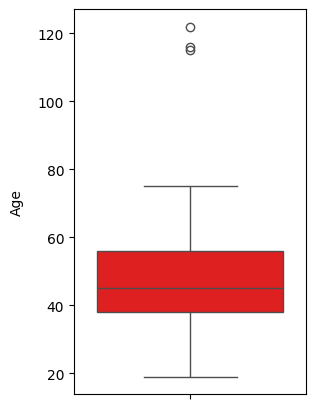

In [18]:
#showing outliers "age"
plt.figure(figsize=(3,5))
sns.boxplot(y=customer.Age, color ='red');
plt.ylabel('Age', fontsize=10, labelpad=10);

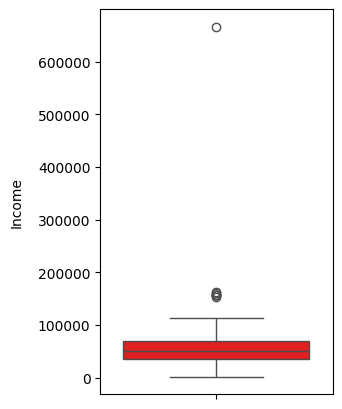

In [19]:
#showing outliers "Income"
plt.figure(figsize=(3,5))
sns.boxplot(y=customer.Income, color ='red');
plt.ylabel('Income', fontsize=10, labelpad=10);

In [20]:
#removing outliers
customer = customer[customer.Age < 100]
customer = customer[customer.Income < 120000]

**Exploratory Data Analysis**

Marital Status

In [21]:
maritalstatus = customer.Marital_Status.value_counts()

fig = px.pie(maritalstatus,
             values = maritalstatus.values,
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 4)))
fig.show()

Average Spendings: Marital Status Wise

<ipython-input-22-afa566a0d7b1>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




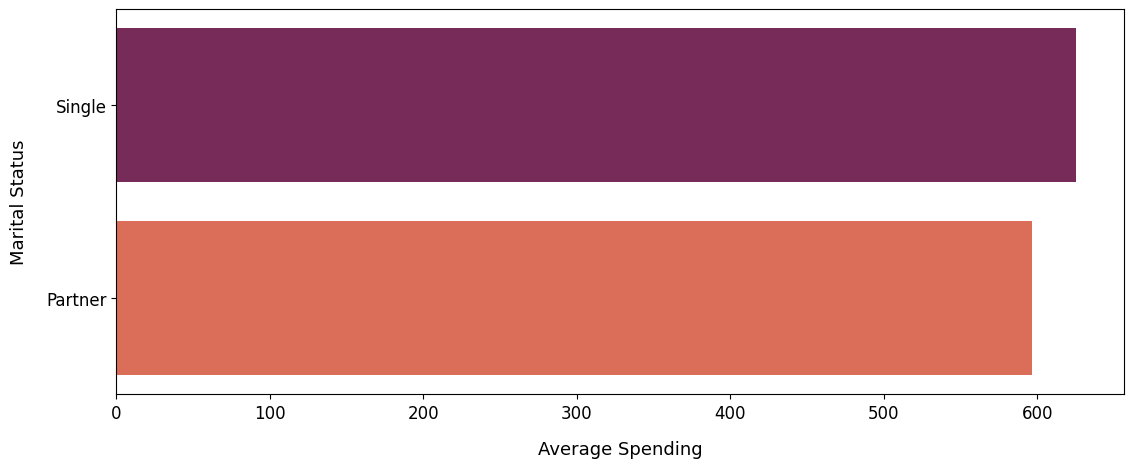

In [22]:
maritalspending = customer.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(13,5))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Average Spending', fontsize=13, labelpad=13)
plt.ylabel('Marital Status', fontsize=13, labelpad=13);

<ipython-input-23-a65d09a51f85>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Marital_Status', ylabel='TotalSpendings'>

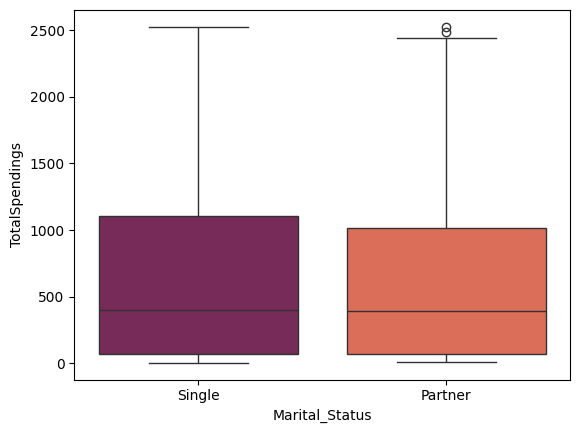

In [23]:
sns.boxplot(x="Marital_Status", y="TotalSpendings", data=customer, palette='rocket')


Education Level

In [24]:
education = customer.Education.value_counts()

fig = px.pie(education,
             values = education.values,
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


Child Status

In [25]:
children = customer.Children.value_counts()

fig = px.pie(children,
             values = children.values,
             names = children.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

In [26]:
fig = px.sunburst(customer, path=['Marital_Status','Education', 'Children'], values='TotalSpendings', color='Education')
fig.show()

Average Spendings: Child Status Wise

<ipython-input-27-16ca79f8003b>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




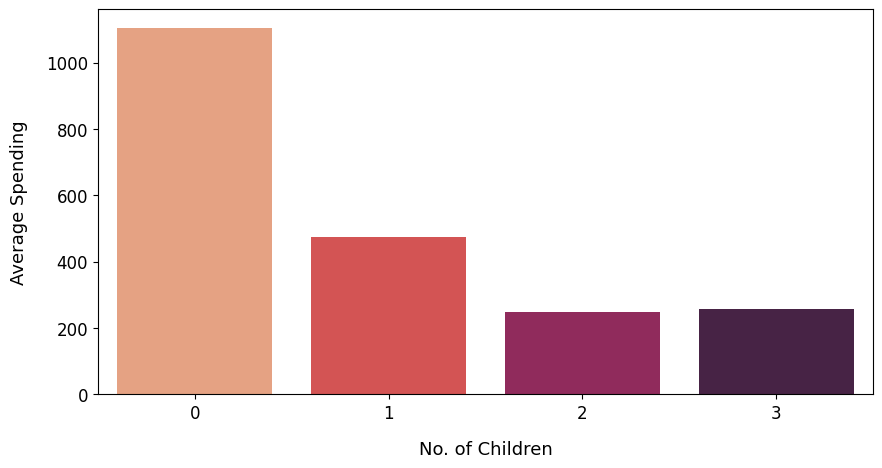

In [27]:
childrenspending = customer.groupby('Children')['TotalSpendings'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(10,5))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending", palette='rocket_r');
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('No. of Children', fontsize=13, labelpad=13)
plt.ylabel('Average Spending', fontsize=13, labelpad=13);

Age Distribution of Customers

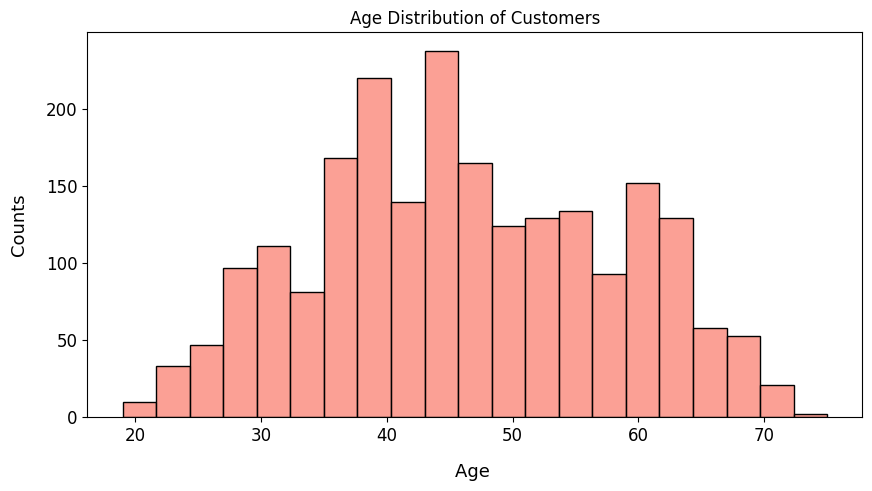

In [28]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = customer.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Age ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13);

Relationship: Age vs Spendings

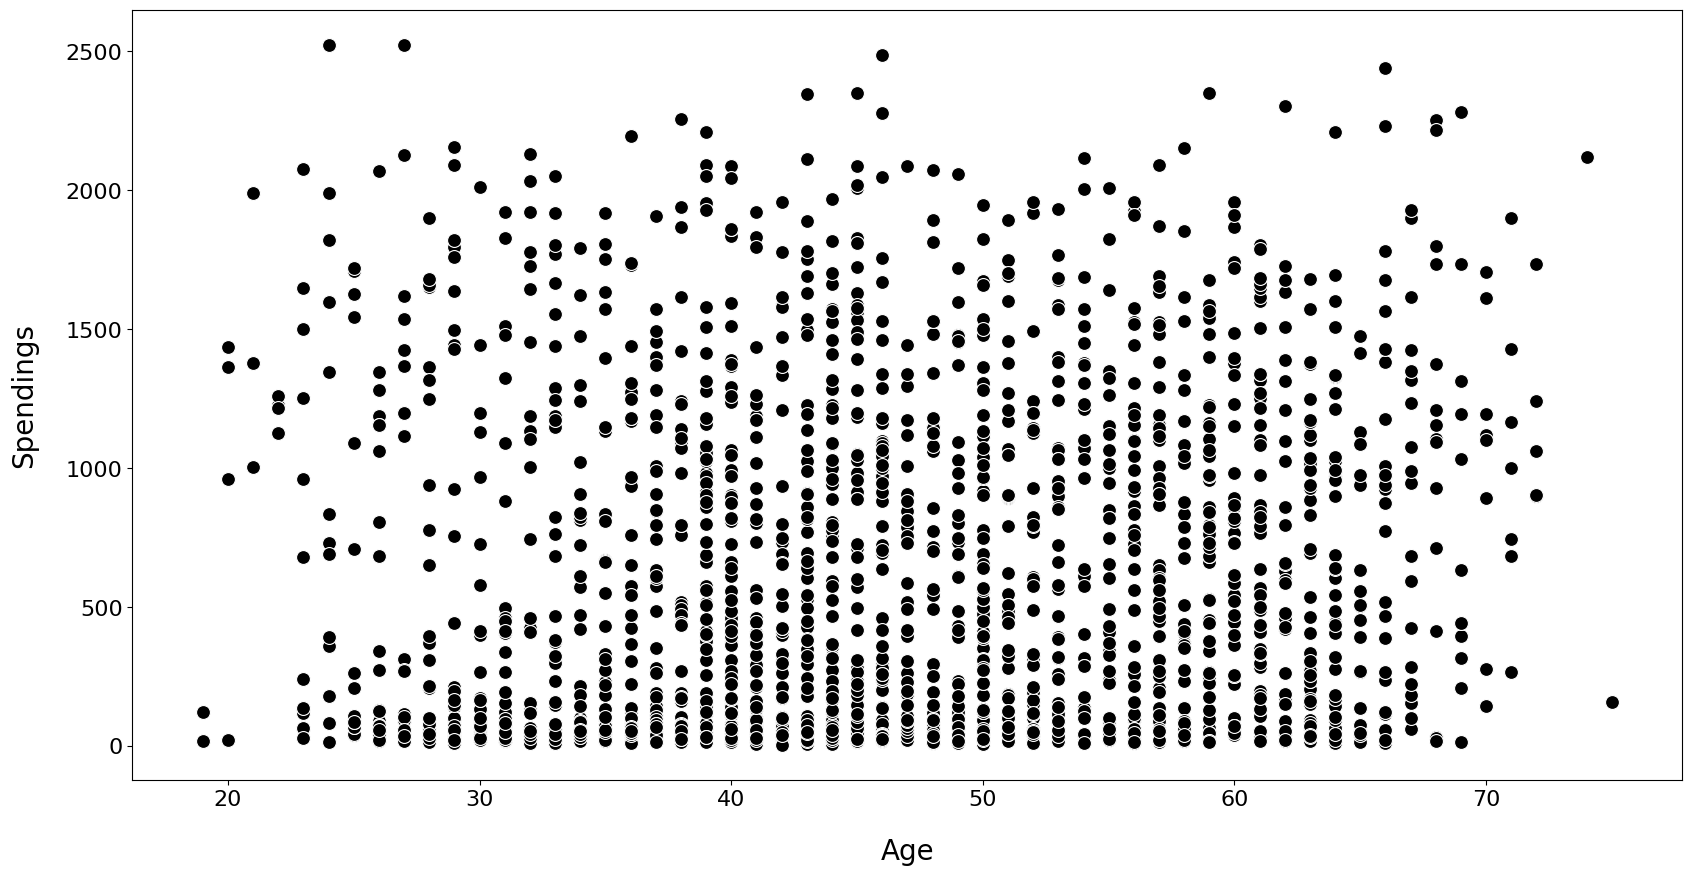

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=customer.Age, y=customer.TotalSpendings, s=100, color ='black');

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

Customers Segmentation: Age Group Wise

In [30]:
agegroup = customer.AgeGroup.value_counts()

fig = px.pie(labels = agegroup.index, values = agegroup.values, names = agegroup.index, width = 550, height = 550)

fig.update_traces(textposition = 'inside',
                  textinfo = 'percent + label',
                  hole = 0.4,
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'],
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Age Groups',
                                      x = 0.5, y = 0.5, font_size = 20, showarrow = False,
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

Average Spendings: Age Group Wise

<ipython-input-31-ba34448a6a07>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




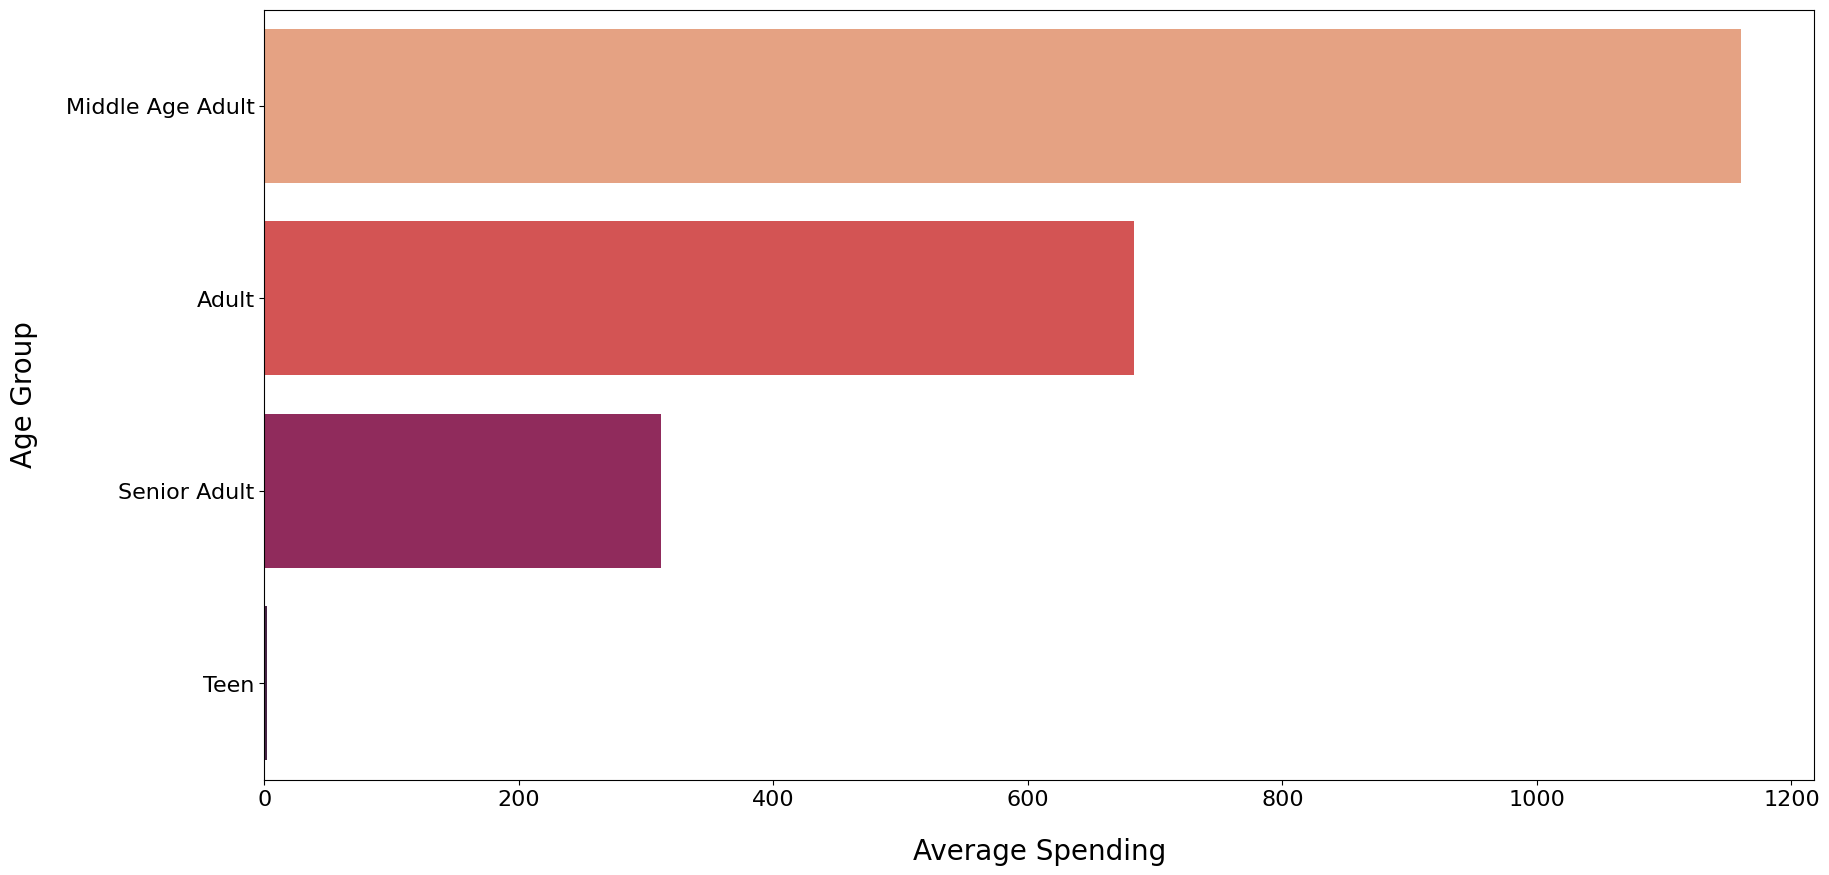

In [31]:
agegroupspending = customer.groupby('AgeGroup')['TotalSpendings'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroup.items()), columns=['Age Group', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data = agegroupspending_df, x="Average Spending", y='Age Group', palette='rocket_r');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Age Group', fontsize=20, labelpad=20);

Income Distribution of Customers

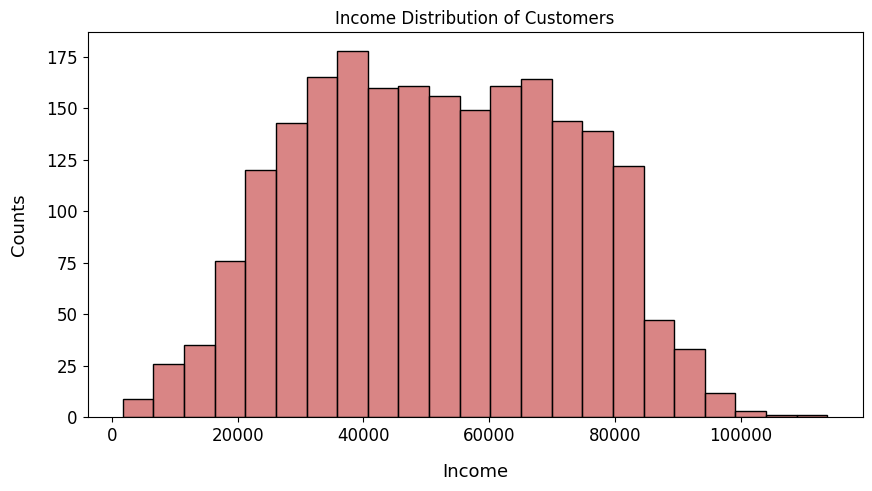

In [32]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = customer.Income, color = "indianred")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Income', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13);

Relationship: Income vs Spendings

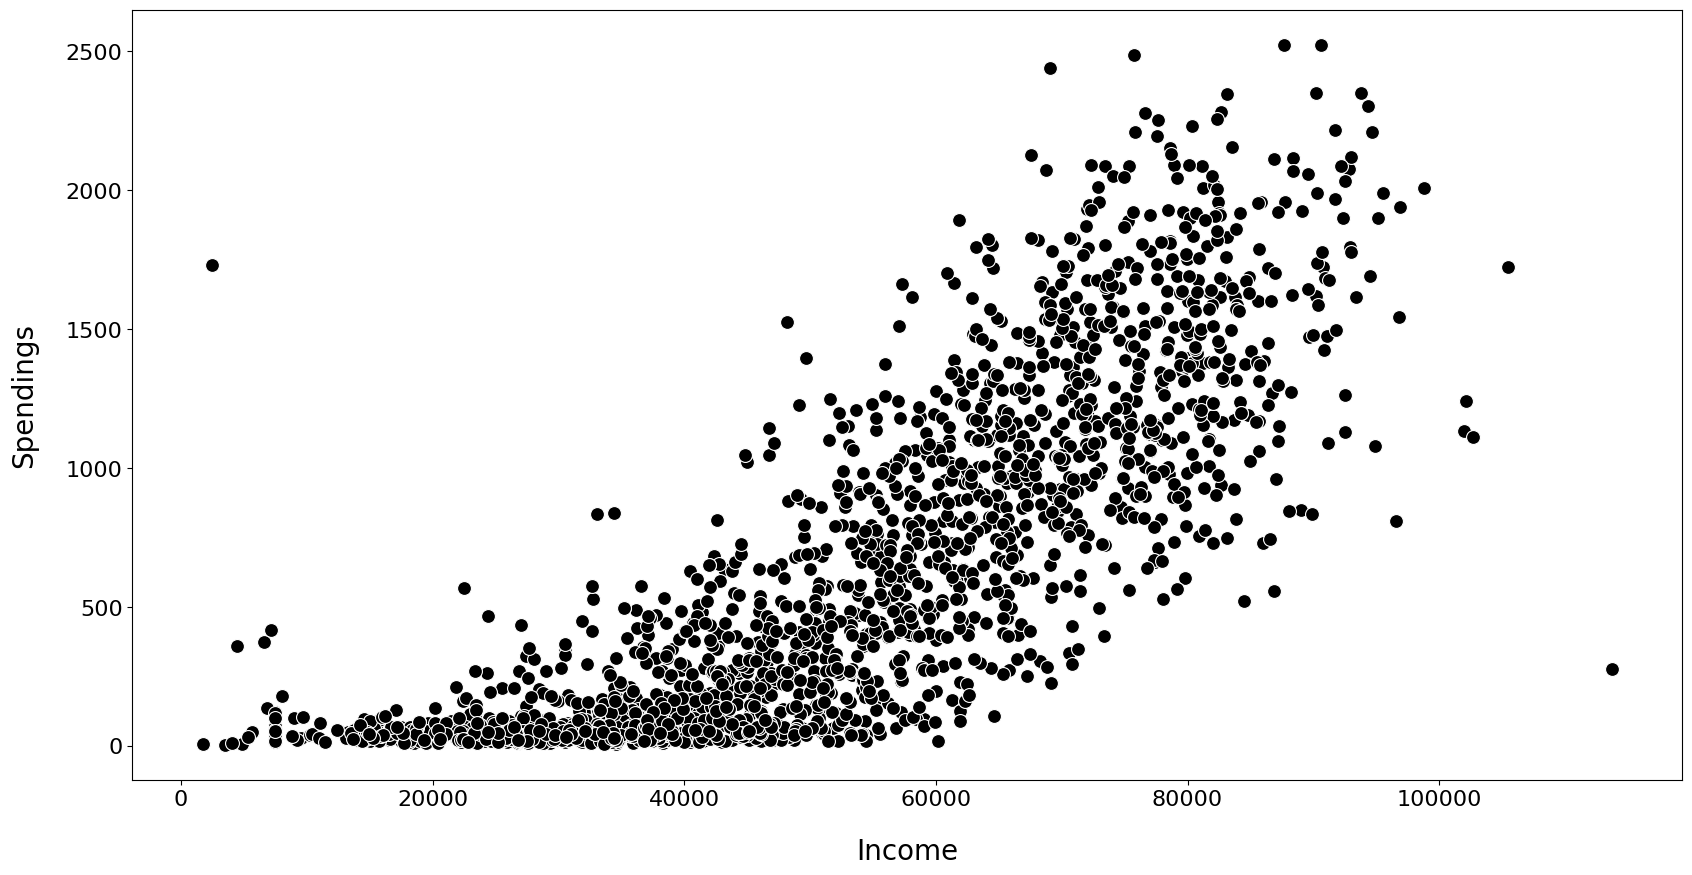

In [33]:
plt.figure(figsize=(20,10))


sns.scatterplot(x=customer.Income, y=customer.TotalSpendings, s=100, color='black');

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

Most Bought Products

<ipython-input-34-0c3c35c3b238>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




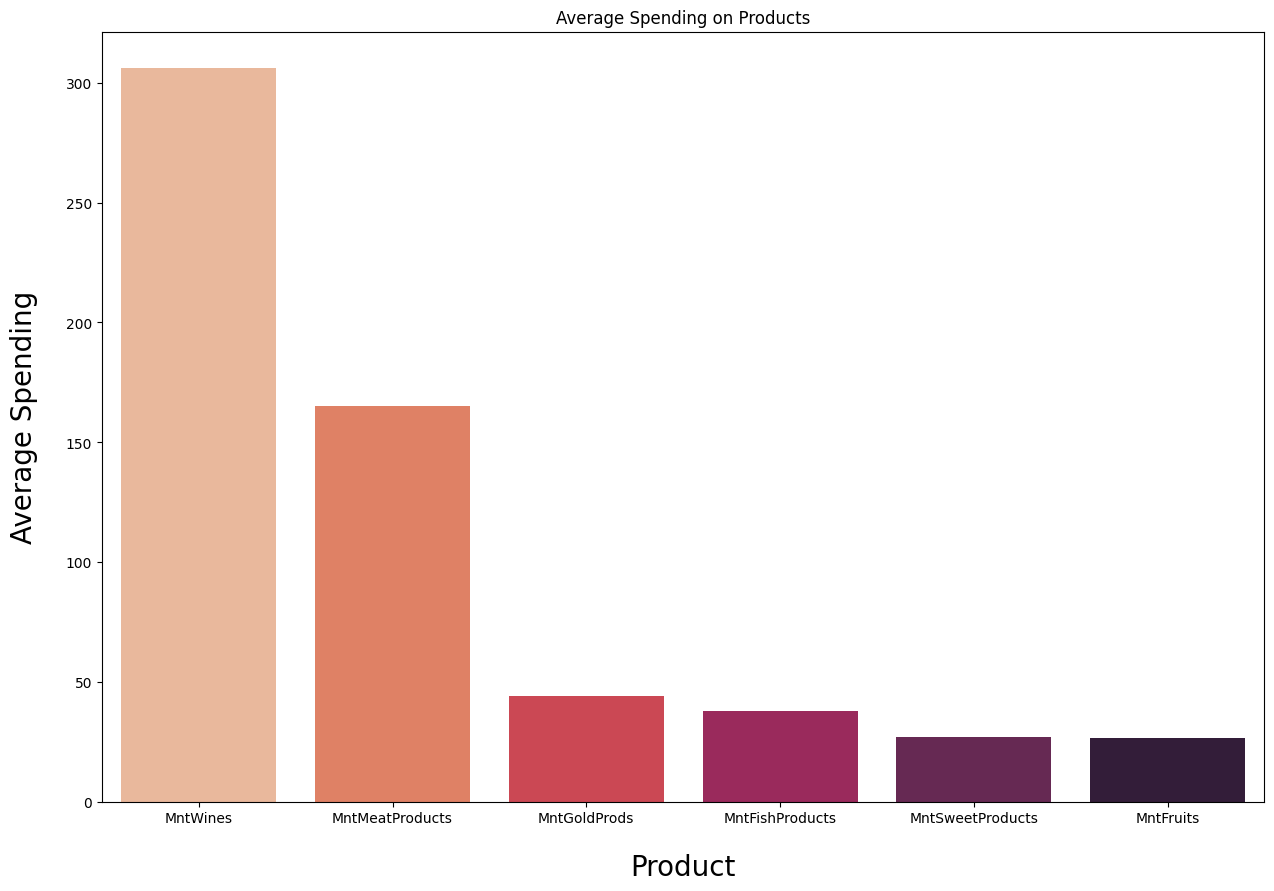

In [34]:
products = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(15,10))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Average Spending', palette='rocket_r');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

Machine Learning Model


Let's identify different customer segments based on various features of the customer data using K-Means Clustering. First, let's remove unnecessary columns from the data.

In [36]:
X = customer.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2205 non-null   float64
 1   Age             2205 non-null   int64  
 2   TotalSpendings  2205 non-null   int64  
 3   Month_Customer  2205 non-null   float64
 4   Children        2205 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 103.4 KB


Optimum Clusters Using Elbow Method

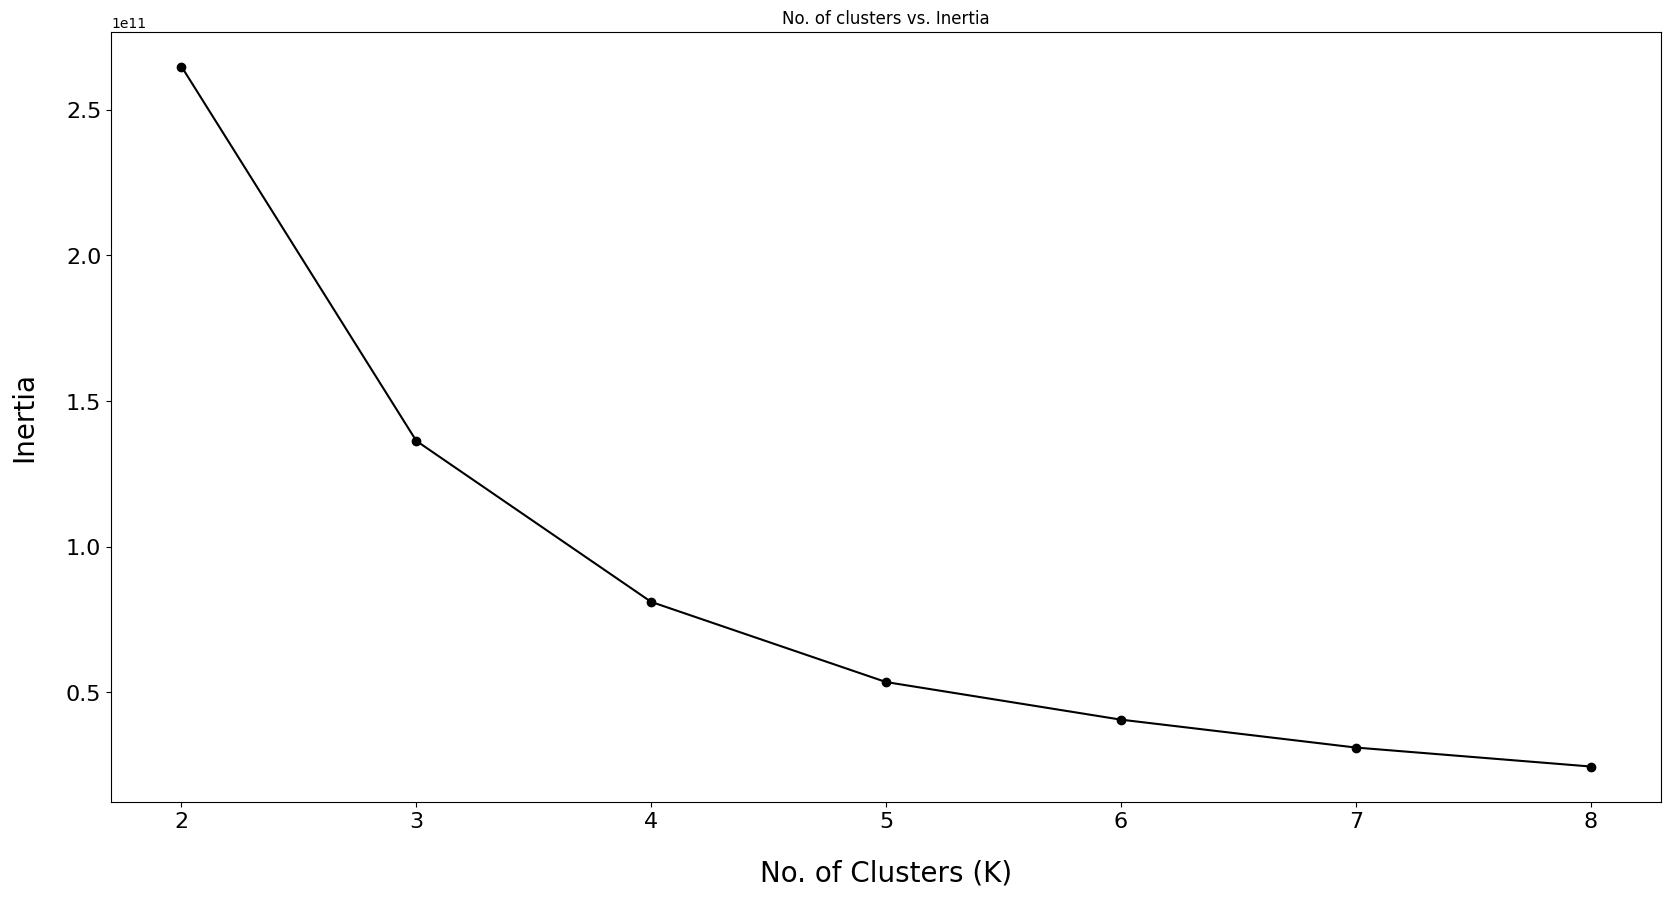

In [38]:
from sklearn.cluster import KMeans

options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o', color = 'black')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);

In [39]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

Clusters Identification

<ipython-input-40-9736a003aee8>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




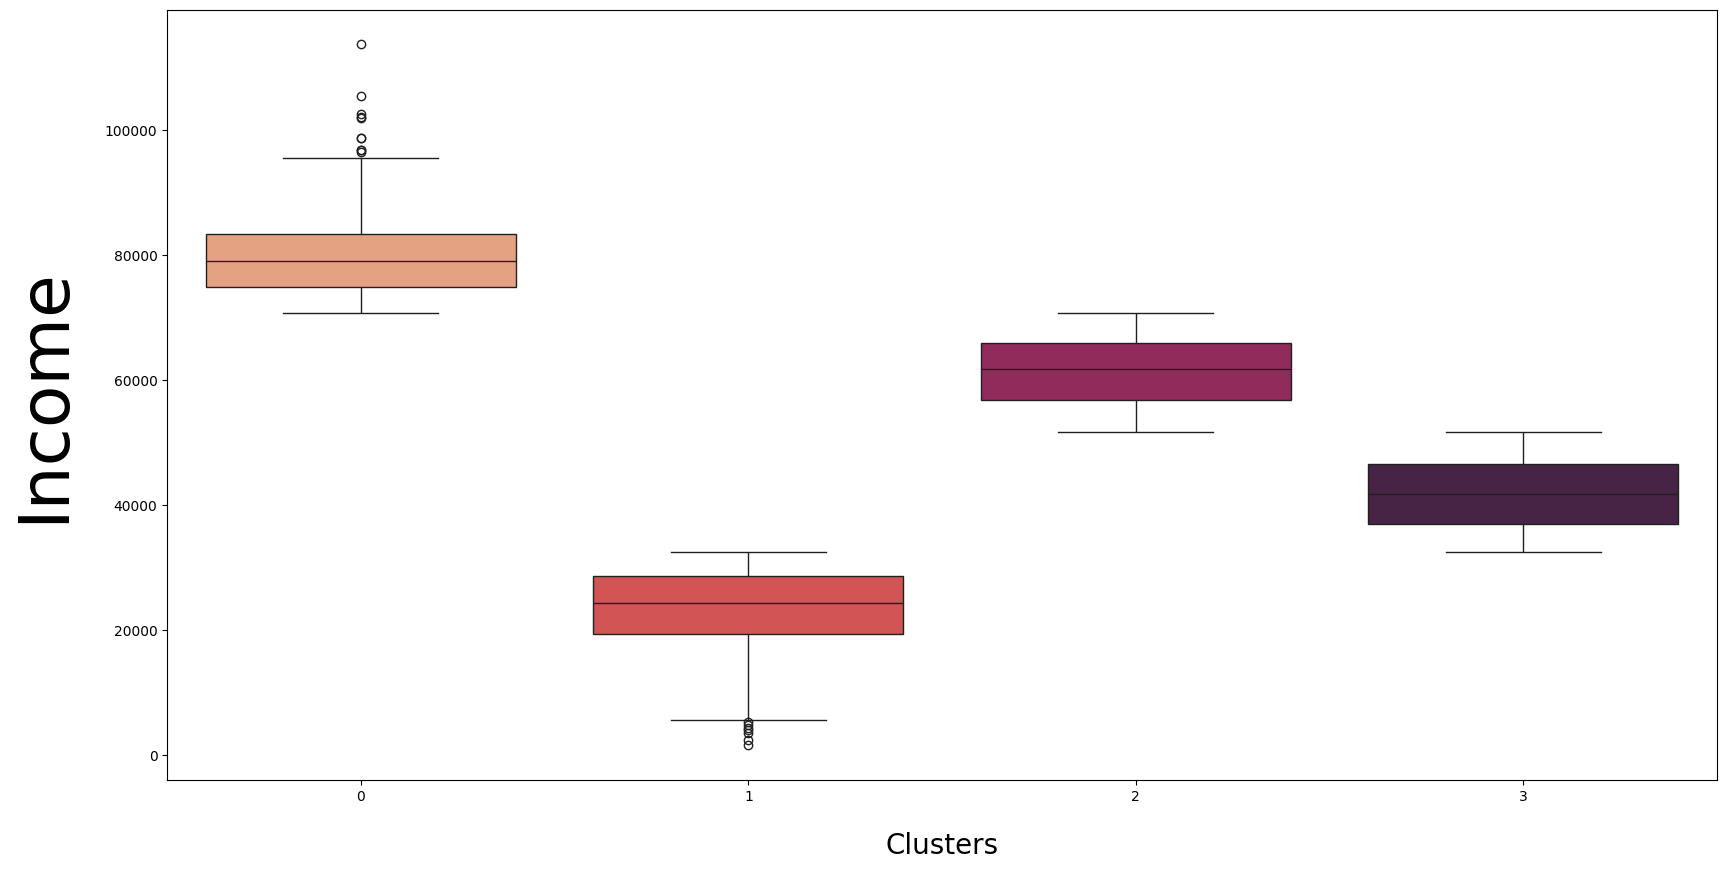

In [40]:
#Income
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=50, labelpad=20);

<ipython-input-41-35eb6dcf4798>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




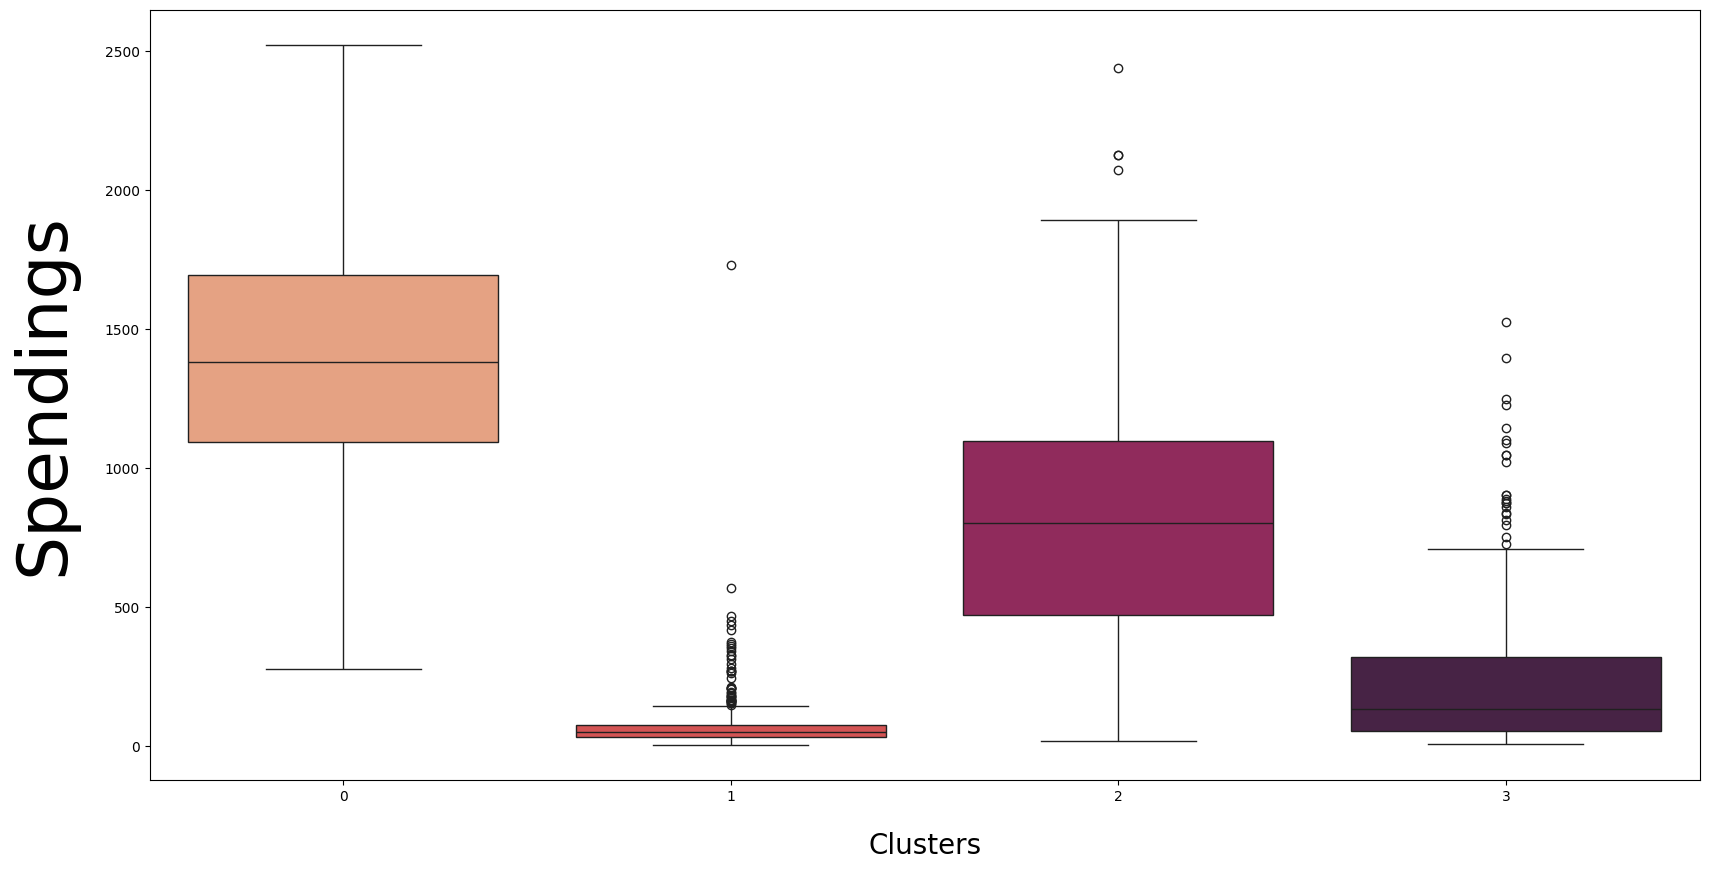

In [41]:
#Total Spending
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'TotalSpendings',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=50, labelpad=20);

<ipython-input-42-87cb96360ed2>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




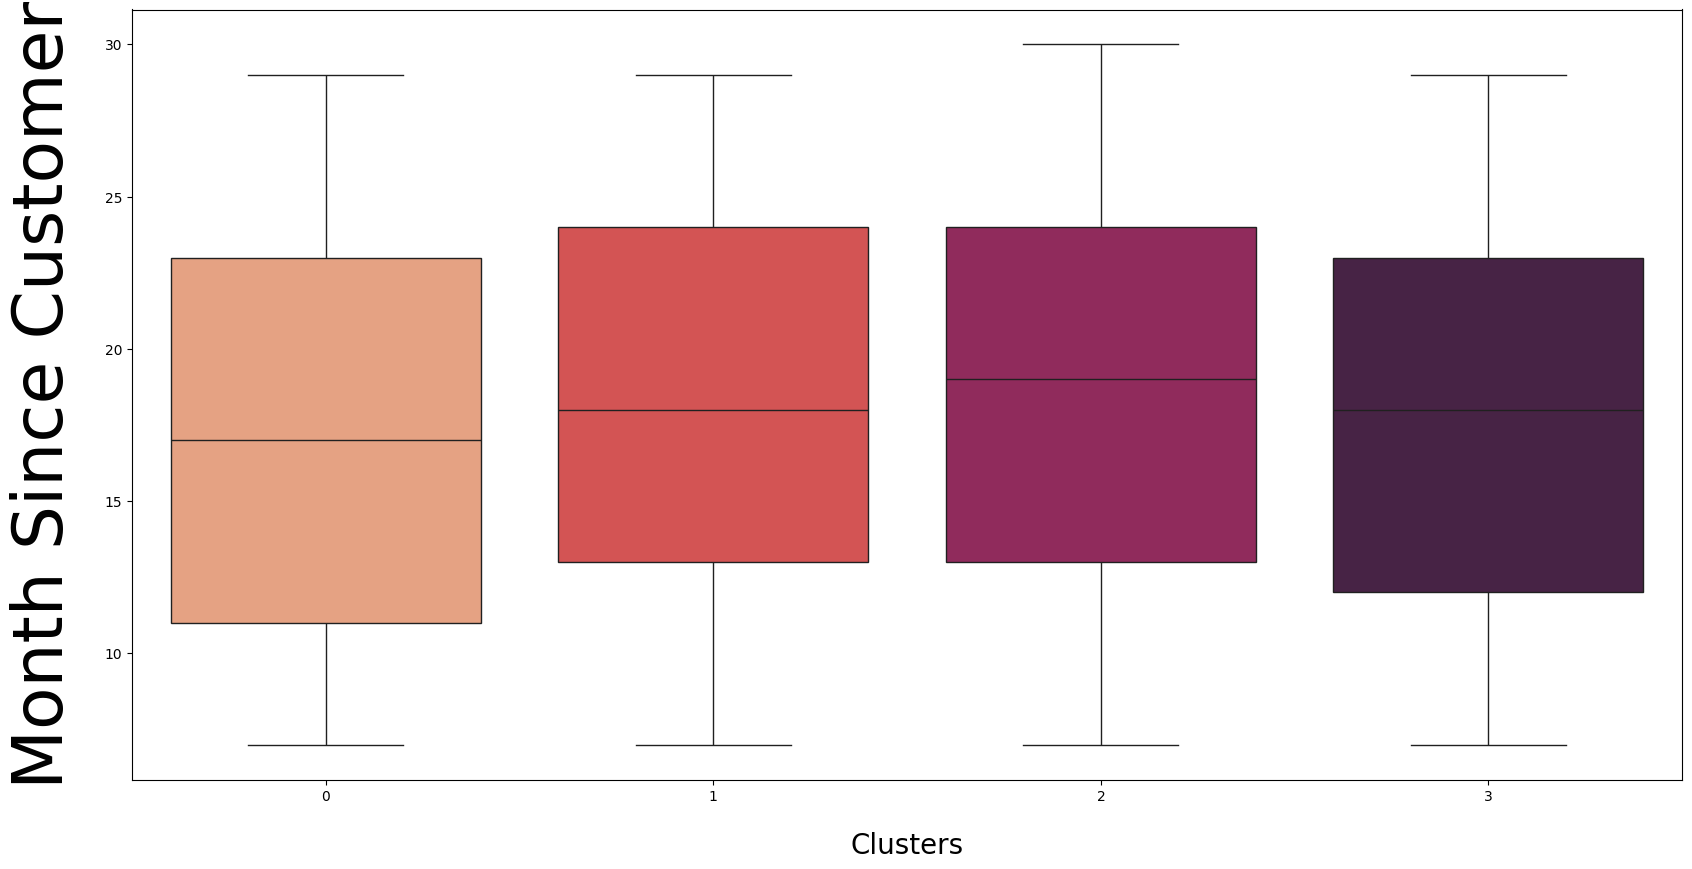

In [42]:
#Month Since Customer
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Month_Customer',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=50, labelpad=20);

<ipython-input-43-6bea088a82ce>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




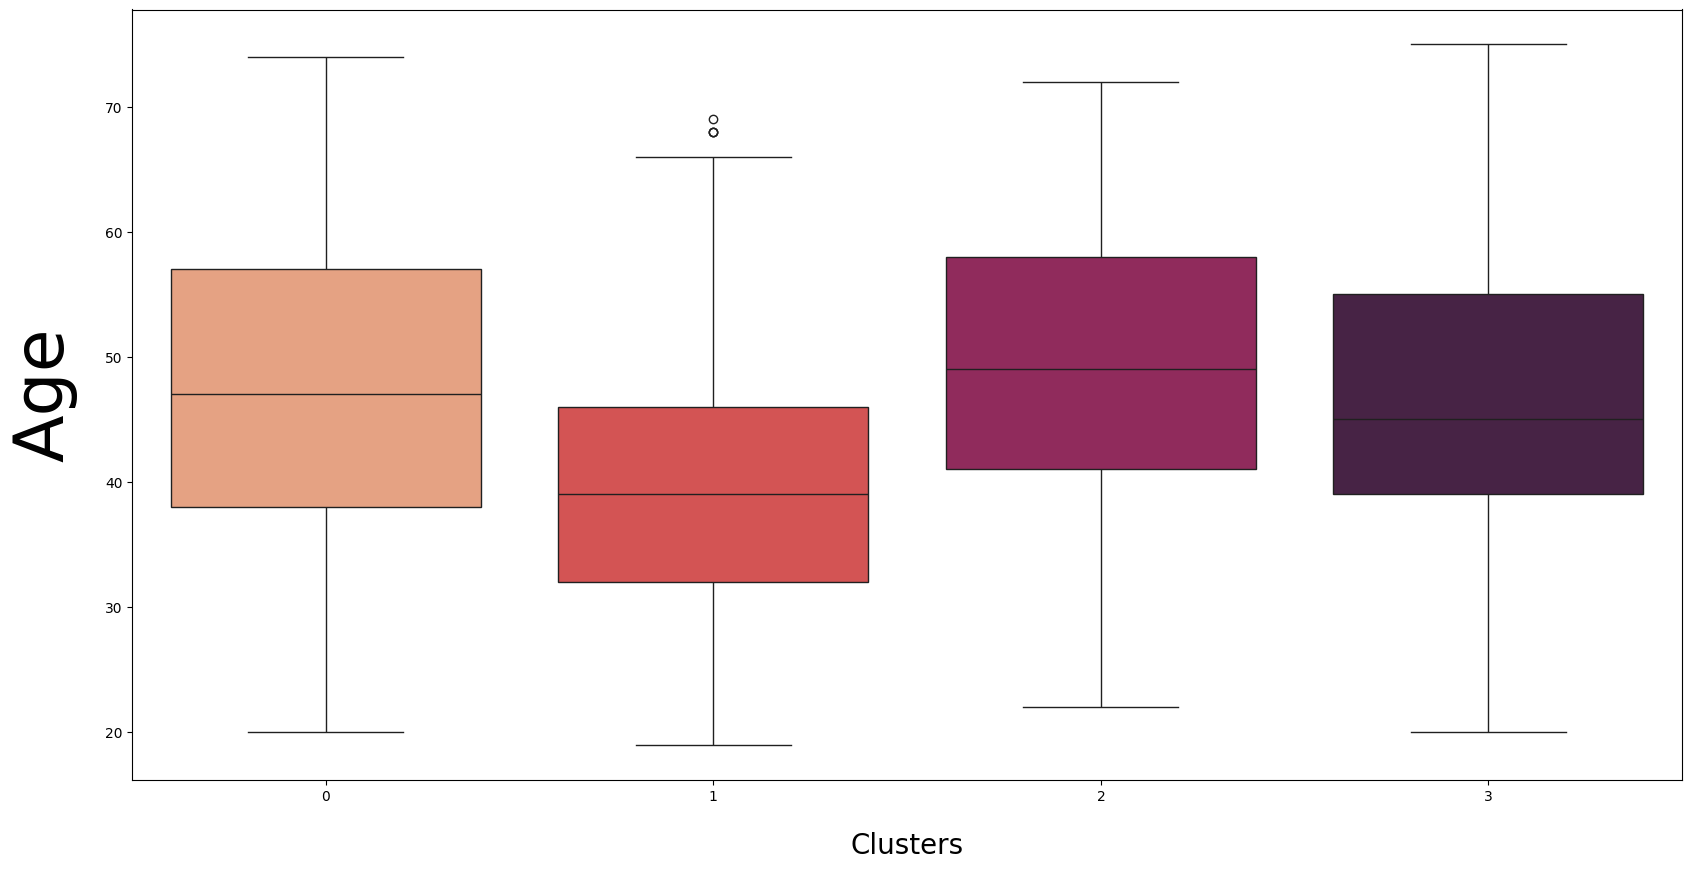

In [43]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=50, labelpad=20);

<ipython-input-44-b35d32f4a113>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




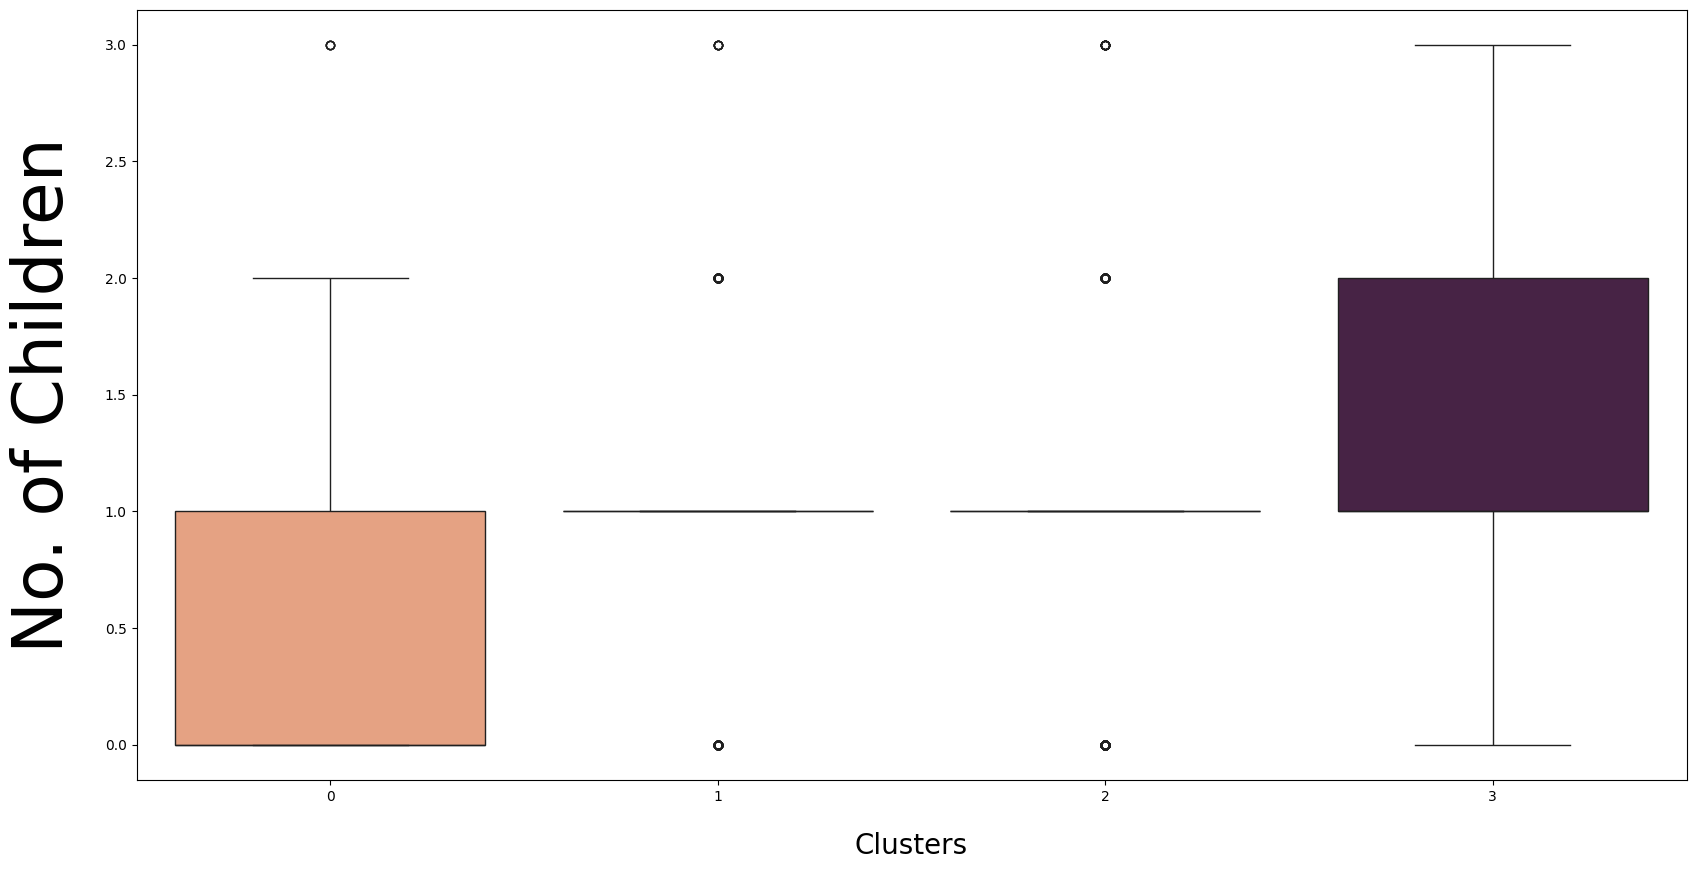

In [44]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Children',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('No. of Children', fontsize=50, labelpad=20);

From the analysis above, we can categorize customers into 4 groups based on their income and total expenditure:

Platinum: Highest income and highest expenditure
Gold: High income and high expenditure
Silver: Low income and lower expenditure
Bronze: Lowest income and lowest expenditure










Data Exploration: Clusters Based

In [45]:
customer_kmeans.clusters = customer_kmeans.clusters.replace({1: 'Bronze',
                                                             2: 'Platinum',
                                                             3: 'Silver',
                                                             0: 'Gold'})

customer['clusters'] = customer_kmeans.clusters

Customers Distribution

In [46]:
cluster_counts = customer.clusters.value_counts()

fig = px.pie(cluster_counts,
             values = cluster_counts.values,
             names = cluster_counts.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


Most customers fall into the Silver and Gold categories, at approximately 29% and 28%, respectively.
Platinum is the third most notable customer category, with 23%, while only 20% belong to the Bronze category.

Relationship: Income vs. Spendings

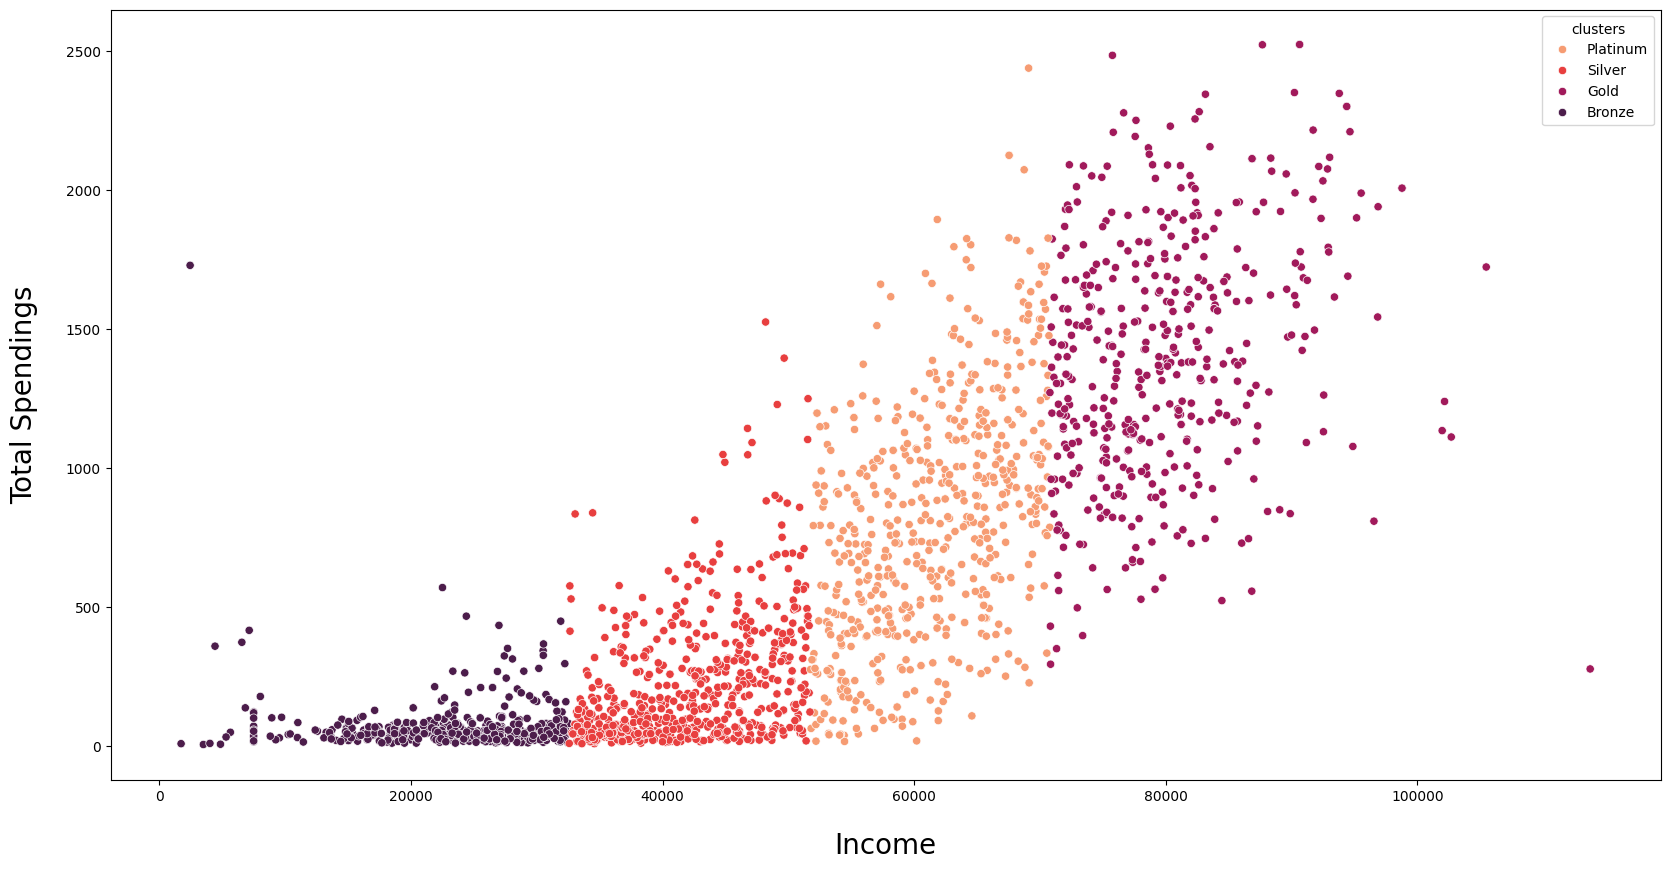

In [47]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=customer, x='Income', y='TotalSpendings', hue='clusters', palette='rocket_r');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

Four clusters can be easily identified from the plot above.
Those who earn more also spend more.

Spending Habits by Clusters

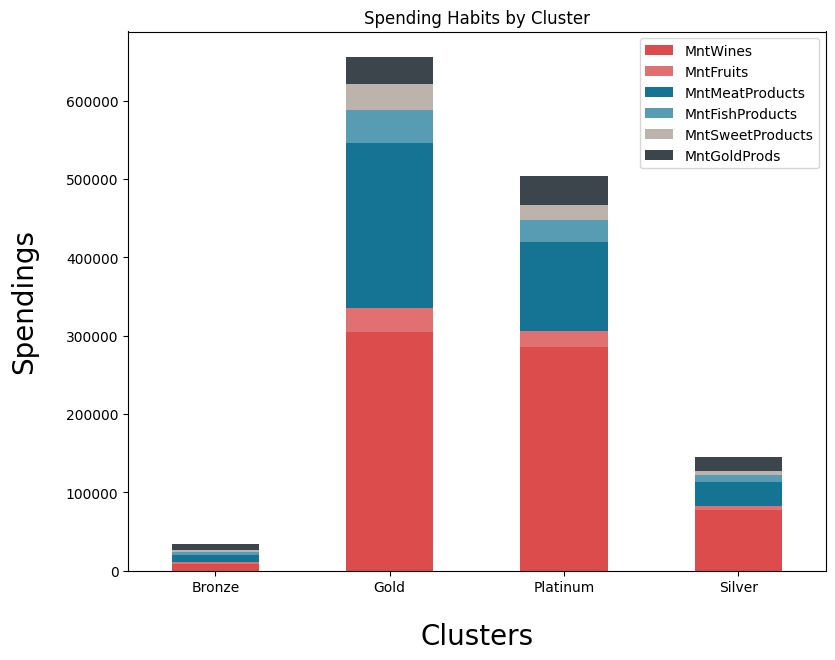

In [48]:
cluster_spendings = customer.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts',
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

cluster_spendings.plot(kind='bar', stacked=True, figsize=(9,7), color=['#dc4c4c','#e17070','#157394','#589cb4','#bcb4ac','#3c444c'])

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

Customers from all segments have spent the majority of their money on Wine and Meat products.








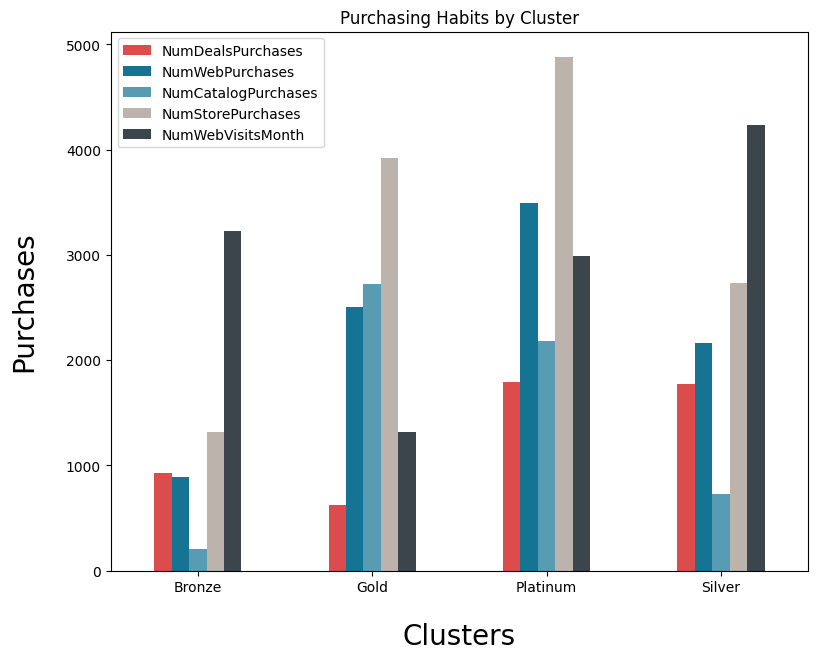

In [49]:
cluster_purchases = customer.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_purchases.plot(kind='bar', color=['#dc4c4c','#157394','#589cb4','#bcb4ac','#3c444c'], figsize=(9,7))

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');



*   Platinum and Gold customers mostly prefer making
purchases in-store.
*   Most web and catalog purchases are also made by customers from the Platinum and Gold segments.

*   Silver and Gold categories also enjoy shopping in-store.
*   Deal purchases are common among Gold and Silver customers.









*   
Customers in the Silver category make the most web visits, while those in the Platinum segment have the fewest web visits.





Promotions Acceptance by Clusters

<Figure size 3000x1500 with 0 Axes>

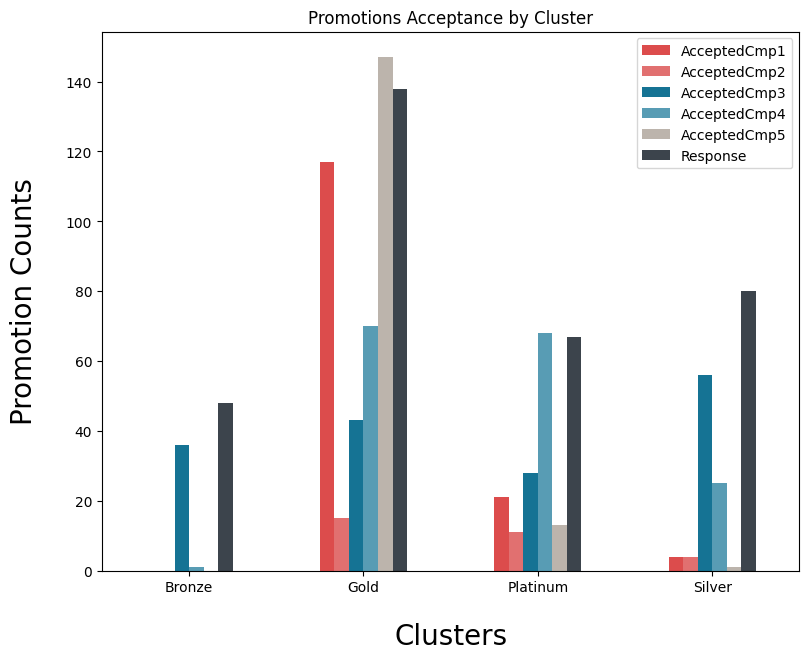

In [50]:
cluster_campaign = customer.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['#dc4c4c','#e17070','#157394','#589cb4','#bcb4ac','#3c444c'],figsize=(9,7))

plt.title('Promotions Acceptance by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');



*   Platinum customers receive the majority of offers from the company.
*  Campaigns 1, 5, and the last one seem to be the most successful.


*  The Bronze category shows the lowest interest in the company's promotional campaigns.





# **Conclusion**

*   The majority of customers are university graduates.
*  Most customers live with a partner.

*  Those who live alone have spent more than those who live with a partner.

*   Most customers have one child.

*   Customers without children have spent more.
*   Middle-aged adults, between the ages of 40 and 60, are the most prominent age group.


*  Middle-aged adults spend on average more than other age groups.


*   Most customers earn between 25,000 and 85,000.
Wine and Meat products are very popular among customers.

*  Based on income and total expenditure, customers are divided into 4 clusters: Platinum, Gold, Silver, and Bronze.
*   
The majority of customers belong to the Silver and Gold categories.


*   
Those with higher income also tend to spend more.
Most customers prefer shopping in-store, followed by online shopping from the web.
*  Platinum customers show the most acceptance towards promotional campaigns, while Bronze customers show the least interest.



















